# Webcam Live on Jupyter

This example shows you how to perform a live webcam playback on Jupyter lab.

It is required to attach a webcam before running the following code.

In [ ]:
import numpy as np
import cv2
from IPython import display
from PIL import Image
import matplotlib.pyplot as py
%matplotlib inline

## Normal live webcam playback

In [ ]:
def showVideo(device_index=0, scale=0.5):
    try:
        cap = cv2.VideoCapture(device_index)
    except:
        print("Cannot Open Device.")
    try:
        ret, frame = cap.read()
        
        while(ret==True):
            ret, frame = cap.read()

            if not ret:
                cap.release()
                print ("Released Video Resource.")
                break
            resized = cv2.resize(frame, (0, 0), fx = scale, fy = scale)
            _,ret_array = cv2.imencode('.jpg', resized) #this fixed the pipeline issue as the imshow was converting to png.
            i = display.Image(data=ret_array)
            display.display(i)
            display.clear_output(wait=True)

    except KeyboardInterrupt:
        cap.release()
        print("Released Video Resource from KeyboardInterrupt.")
    pass

### It is recommended to stop webcam live like this.
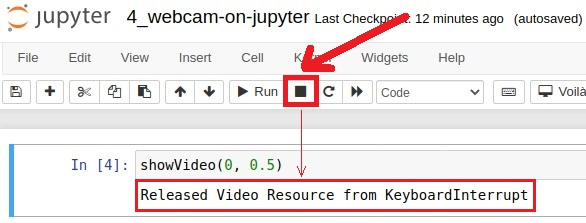

In [ ]:
showVideo(0, 0.5)

### Otherwise, the webcam will be hung and cannot be used further.
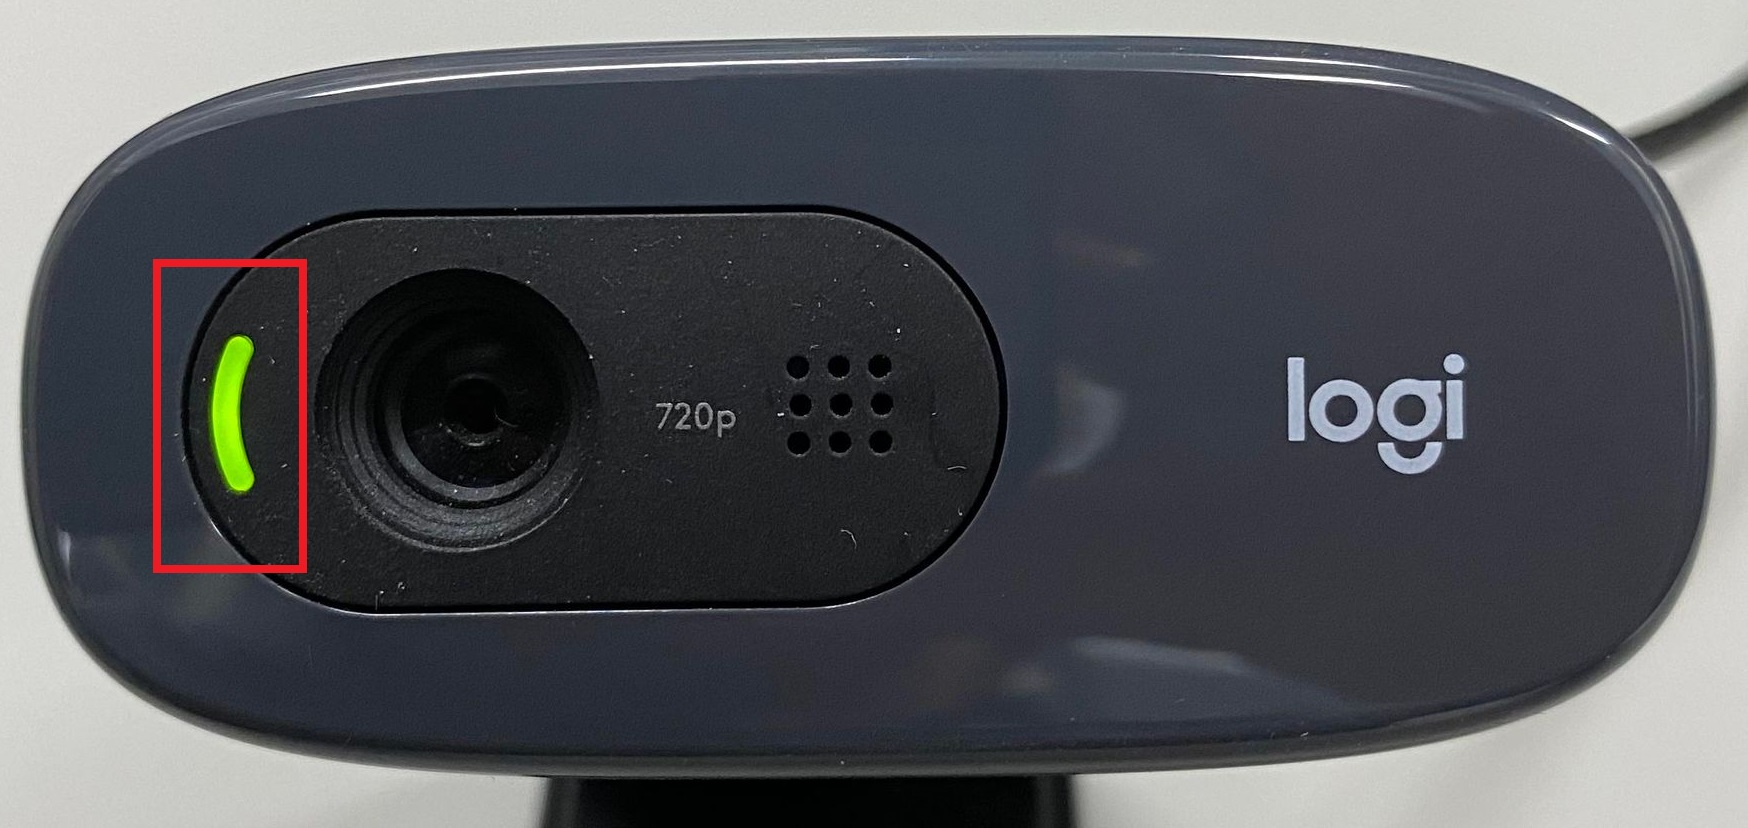

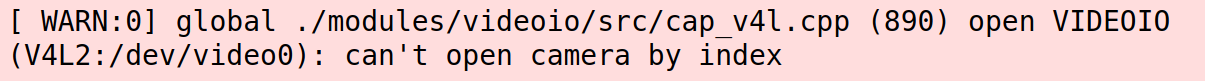

## Live webcam playback with filters

In [ ]:
def showVideoWithFilter(device_index=0, scale=0.5, filter_name=None):
    try:
        cap = cv2.VideoCapture(device_index)
    except:
        print("Cannot Open Device.")
    try:
        ret, frame = cap.read()
        
        while(ret==True):
            ret, frame = cap.read()

            if not ret:
                cap.release()
                print ("Released Video Resource.")
                break
            resized = cv2.resize(frame, (0, 0), fx = scale, fy = scale)
            filtered = resized
            
            ## Filtering
            if filter_name == None:
                pass
            elif filter_name == 'canny':
                filtered = cv2.Canny(resized, 100, 110)
            elif filter_name == 'blur':
                filtered = cv2.GaussianBlur(resized,(5,5),0)
            else:
                print("Chosen filter is not supported.")
                break

            _,ret_array = cv2.imencode('.jpg', filtered) #this fixed the pipeline issue as the imshow was converting to png.
            i = display.Image(data=ret_array)
            display.display(i)
            display.clear_output(wait=True)

    except KeyboardInterrupt:
        cap.release()
        print("Released Video Resource from KeyboardInterrupt.")
    pass

In [ ]:
showVideoWithFilter(0, 0.5, 'canny') # or use 'blur' instead of 'canny'.

## Reference

[1] https://raymondlo84.medium.com/how-to-run-webcam-closer-to-real-time-performance-on-jupyter-notebook-python-3-in-2021-284c6c6364c6